# **Load Data From Sklearn**

In [59]:
from sklearn.datasets import load_diabetes
import numpy as np

In [60]:
diabetes=load_diabetes()


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=diabetes.data
y=diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Decision Tree Regression Model**

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_tree_reg = grid_search.best_estimator_

y_pred = best_tree_reg.predict(X_test)





In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

En iyi parametreler: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
MSE: 3390.583252259646
RMSE: 58.228715014669916


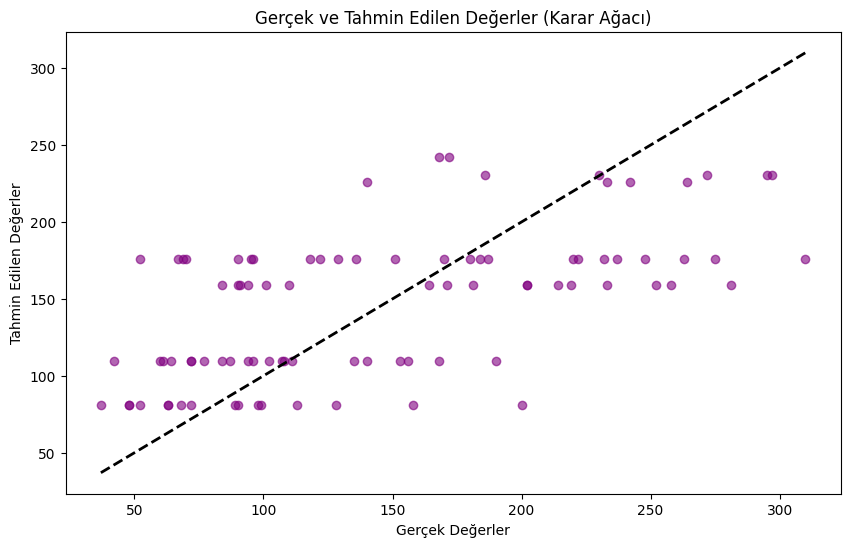

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="purple", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek ve Tahmin Edilen Değerler (Karar Ağacı)")
plt.show()